In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import pmdarima as pm

In [2]:
# read files (summers only)
df08 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2008Summer.xlsx")
df09 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2009Summer.xlsx")
df10 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2010Summer.xlsx")
df11 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2011Summer.xlsx")
df12 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2012Summer.xlsx")
df13 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2013Summer.xlsx")
df14 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2014Summer.xlsx")
df15 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2015Summer.xlsx")
df16 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2016Summer.xlsx")
df17 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2017Summer.xlsx")
df18 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2018April-October.xls")
df19 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Summers/2019October.xlsx")

In [3]:
# read files (full years)
df20 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Full Years/2020January-December.xlsx")
df21 = pd.read_excel("/Users/gillian/Documents/Bellevue Grad Program/Winter 2023-24/Project 1/Full Years/2021_Ozone_Exceedances_January-October.xlsx")

In [4]:
# change Park Codes in df21 to be compliant with those in the other dfs
parkCodes = {'SEKI-AS': 'SEKI', 'SEKI-LK': 'SEKI', 'ACAD-CM': 'ACAD', 'ACAD-MH': 'ACAD', 
             'CANY-IS': 'CANY', 'CAVE-BB': 'CAVE', 'CHCU-RR': 'CHCU', 'CHIR-ES': 'CHIR', 
             'CRMO-VC': 'CRMO', 'DEVA-PV': 'DEVA', 'DINO-WE': 'DINO', 'GRBA-MY': 'GRBA', 
             'GRSM-LR': 'GRSM', 'GUMO-MA': 'GUMO', 'INDU-WT': 'INDU', 'JOTR-CV': 'JOTR', 
             'JOTR-BR': 'JOTR', 'LAVO-ML': 'LAVO', 'MEVE-RM': 'MEVE', 'PEFO-SE': 'PEFO', 
             'RANG-GC': 'RANG', 'ROMO-LP': 'ROMO', 'THRO-VC': 'THRO', 'YELL-WT': 'YELL', 
             'YOSE-TD': 'YOSE', 'ZION-DW': 'ZION'}

In [5]:
# remove columns for January, February, March, November, December for uniformity
extra_months = ["January", "February", "March", "November", "December"]
df20 = df20.drop(extra_months, axis = 1)
df21 = df21.drop(extra_months, axis = 1)
# only include parks that had a total of more than 1 ozone exceedance day
df20 = df20[df20["Total"] > 0]
df21 = df21[df21["Total"] > 0]
# change Park Code for df21 to be consistent with other dfs
df21["Park Code"] = df21["Park Code"].replace(parkCodes)

In [6]:
# list of original dataframes
original_dfs = [df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21]

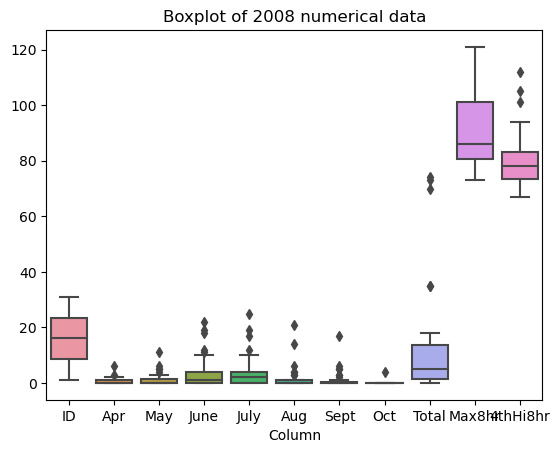

In [7]:
# boxplots for 2008
sns.boxplot(data = df08)
plt.xlabel("Column")
plt.title("Boxplot of 2008 numerical data")
# plt.savefig("boxplot08.png")
plt.show()

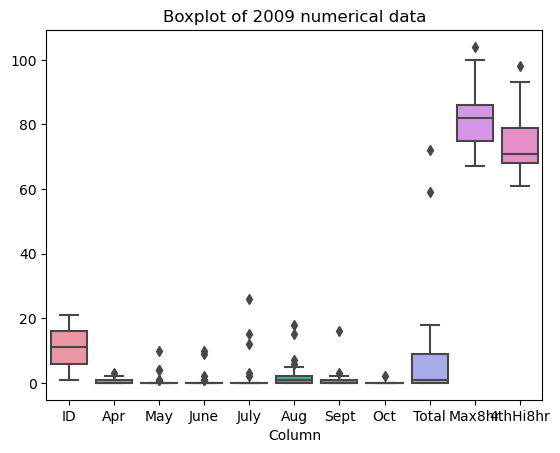

In [8]:
# boxplots for 2009
sns.boxplot(data = df09)
plt.xlabel("Column")
plt.title("Boxplot of 2009 numerical data")
# plt.savefig("boxplot09.png")
plt.show()

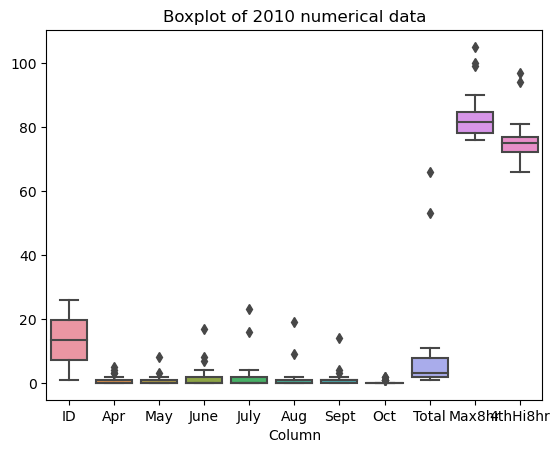

In [9]:
# boxplots for 2010
sns.boxplot(data = df10)
plt.xlabel("Column")
plt.title("Boxplot of 2010 numerical data")
# plt.savefig("boxplot10.png")
plt.show()

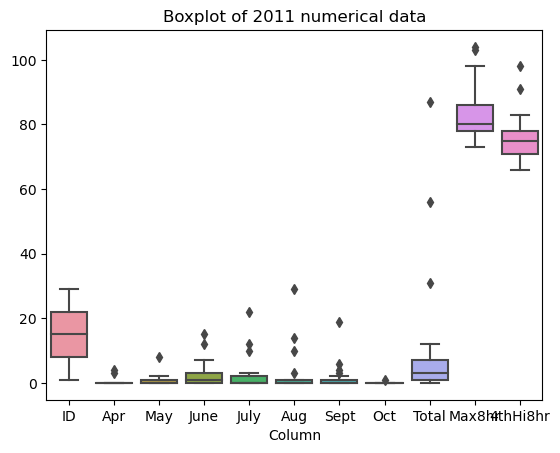

In [10]:
# boxplots for 2011
sns.boxplot(data = df11)
plt.xlabel("Column")
plt.title("Boxplot of 2011 numerical data")
# plt.savefig("boxplot11.png")
plt.show()

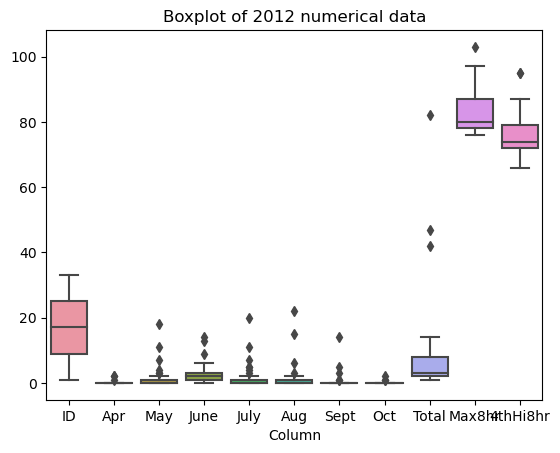

In [11]:
# boxplots for 2012
sns.boxplot(data = df12)
plt.xlabel("Column")
plt.title("Boxplot of 2012 numerical data")
# plt.savefig("boxplot12.png")
plt.show()

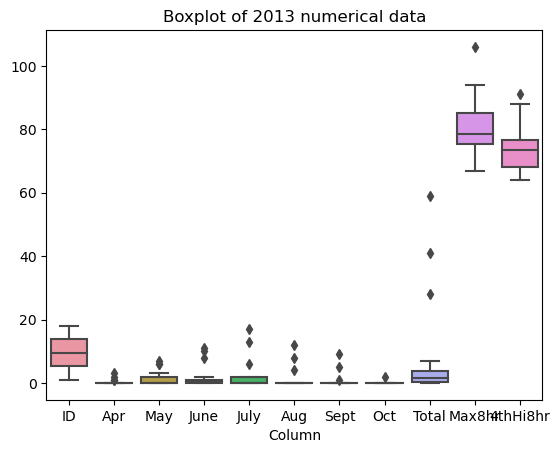

In [12]:
# boxplots for 2013
sns.boxplot(data = df13)
plt.xlabel("Column")
plt.title("Boxplot of 2013 numerical data")
# plt.savefig("boxplot13.png")
plt.show()

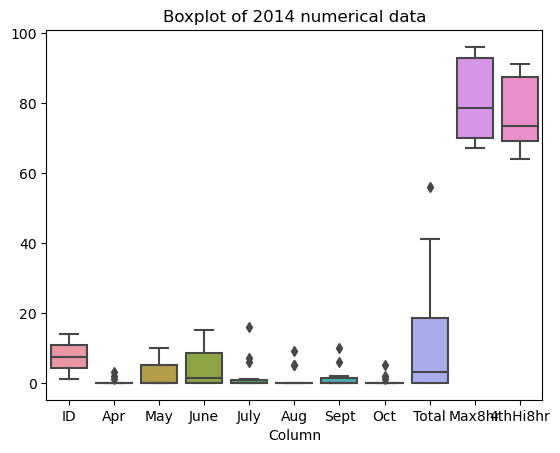

In [13]:
# boxplots for 2014
sns.boxplot(data = df14)
plt.xlabel("Column")
plt.title("Boxplot of 2014 numerical data")
# plt.savefig("boxplot14.png")
plt.show()

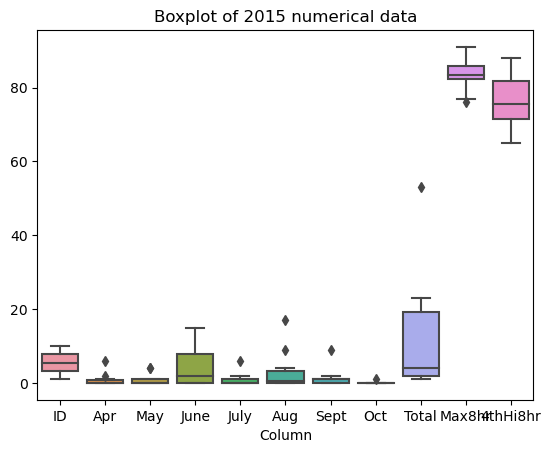

In [14]:
# boxplots for 2015
sns.boxplot(data = df15)
plt.xlabel("Column")
plt.title("Boxplot of 2015 numerical data")
# plt.savefig("boxplot15.png")
plt.show()

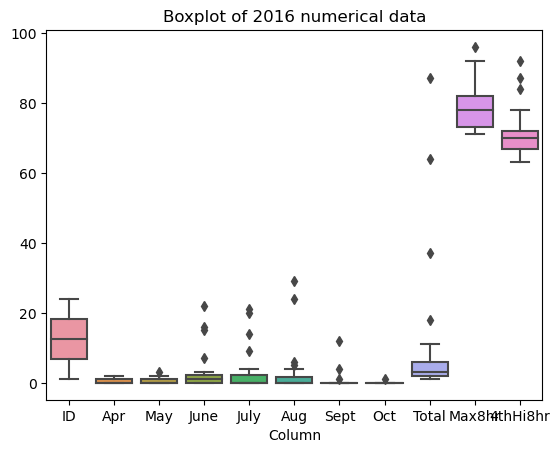

In [15]:
# boxplots for 2016
sns.boxplot(data = df16)
plt.xlabel("Column")
plt.title("Boxplot of 2016 numerical data")
# plt.savefig("boxplot16.png")
plt.show()

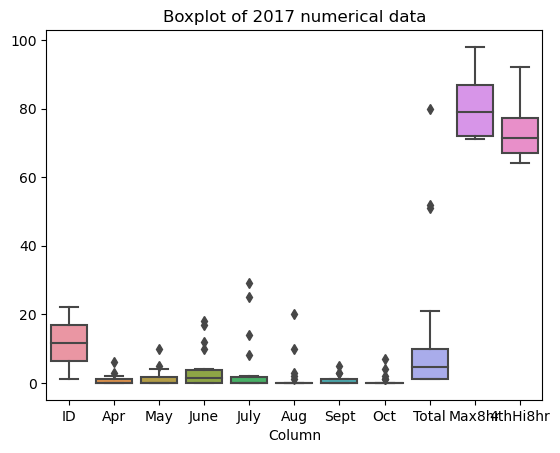

In [16]:
# boxplots for 2017
sns.boxplot(data = df17)
plt.xlabel("Column")
plt.title("Boxplot of 2017 numerical data")
# plt.savefig("boxplot17.png")
plt.show()

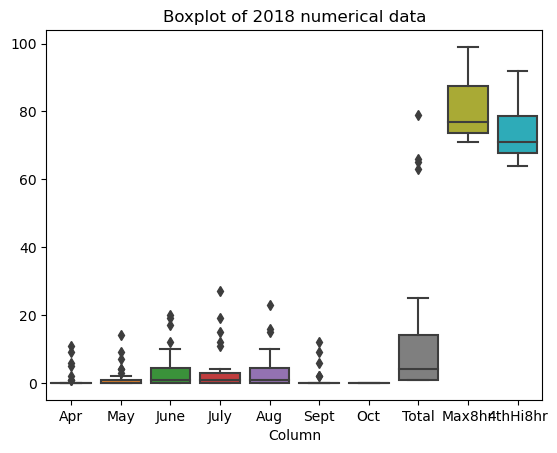

In [17]:
# boxplots for 2018
sns.boxplot(data = df18)
plt.xlabel("Column")
plt.title("Boxplot of 2018 numerical data")
# plt.savefig("boxplot18.png")
plt.show()

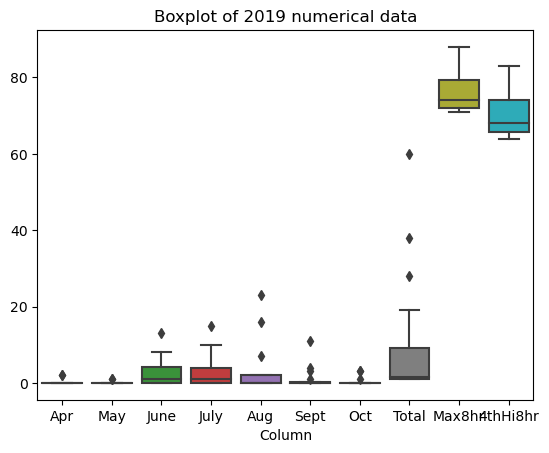

In [18]:
# boxplots for 2019
sns.boxplot(data = df19)
plt.xlabel("Column")
plt.title("Boxplot of 2019 numerical data")
# plt.savefig("boxplot19.png")
plt.show()

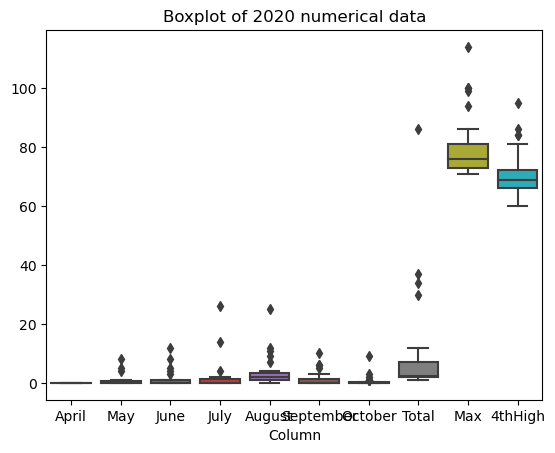

In [19]:
# boxplots for 2020
sns.boxplot(data = df20)
plt.xlabel("Column")
plt.title("Boxplot of 2020 numerical data")
# plt.savefig("boxplot20.png")
plt.show()

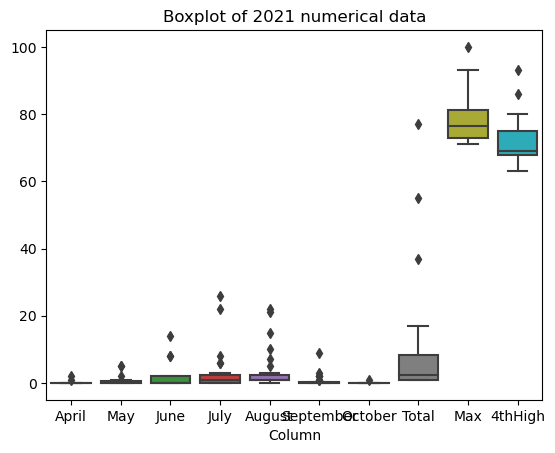

In [20]:
# boxplots for 2021
sns.boxplot(data = df21)
plt.xlabel("Column")
plt.title("Boxplot of 2021 numerical data")
# plt.savefig("boxplot21.png")
plt.show()

In [21]:
# stats for each year
for i in original_dfs:
    print(i.describe())
    print("-"*70)

              ID        Apr        May       June       July        Aug  \
count  31.000000  31.000000  31.000000  31.000000  31.000000  31.000000   
mean   16.000000   0.741935   1.387097   4.129032   4.258065   1.870968   
std     9.092121   1.237410   2.512335   6.125041   6.196600   4.536827   
min     1.000000   0.000000   0.000000   0.000000   0.000000   0.000000   
25%     8.500000   0.000000   0.000000   0.000000   0.000000   0.000000   
50%    16.000000   0.000000   0.000000   1.000000   2.000000   0.000000   
75%    23.500000   1.000000   1.500000   4.000000   4.000000   1.000000   
max    31.000000   6.000000  11.000000  22.000000  25.000000  21.000000   

            Sept        Oct      Total      Max8hr    4thHi8hr  
count  31.000000  31.000000  31.000000   31.000000   31.000000  
mean    1.354839   0.129032  13.903226   89.806452   80.032258  
std     3.371927   0.718421  21.332846   12.747338   10.609693  
min     0.000000   0.000000   0.000000   73.000000   67.000000  

       April        May       June       July     August  September  \
count   26.0  27.000000  28.000000  28.000000  28.000000  28.000000   
mean     0.0   0.777778   1.285714   2.000000   3.642857   1.357143   
std      0.0   1.887883   2.826556   5.429685   5.257899   2.482745   
min      0.0   0.000000   0.000000   0.000000   0.000000   0.000000   
25%      0.0   0.000000   0.000000   0.000000   1.000000   0.000000   
50%      0.0   0.000000   0.000000   0.000000   2.000000   0.000000   
75%      0.0   0.500000   1.000000   1.250000   3.250000   1.250000   
max      0.0   8.000000  12.000000  26.000000  25.000000  10.000000   

         October      Total         Max    4thHigh  
count  28.000000  28.000000   28.000000  28.000000  
mean    0.642857   9.678571   80.214286  71.214286  
std     1.789150  17.938276   11.012979   8.125666  
min     0.000000   1.000000   71.000000  60.000000  
25%     0.000000   2.000000   73.000000  66.000000  
50%     0.000000   2.500000   76.000000  6

In [22]:
# adding year column
df08["Year"] = 2008
df09["Year"] = 2009
df10["Year"] = 2010
df11["Year"] = 2011
df12["Year"] = 2012
df13["Year"] = 2013
df14["Year"] = 2014
df15["Year"] = 2015
df16["Year"] = 2016
df17["Year"] = 2017
df18["Year"] = 2018
df19["Year"] = 2019
df20["Year"] = 2020
df21["Year"] = 2021

In [23]:
# unify column names
df08.rename(columns={'ParkCode': 'Park Code'}, inplace=True)
df20.rename(columns={'April': 'Apr', 'August': 'Aug', 'September': 'Sept', 'October': 'Oct', 
                     'Max': 'Max8hr', '4thHigh': '4thHi8hr'}, inplace=True)
df21.rename(columns={'April': 'Apr', 'August': 'Aug', 'September': 'Sept', 'October': 'Oct', 
                     'Max': 'Max8hr', '4thHigh': '4thHi8hr'}, inplace=True)

In [24]:
# combine dataframes into one dataframe
df_all = pd.concat([df08, df09, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19, df20, df21])
# create column for unique site id
df_all["Site ID"] = df_all["Park Code"]+df_all["Site"]
# drop original ID column
df_all = df_all.drop('ID', axis=1)

In [25]:
# number of unique Site ID's
df_all["Site ID"].nunique()

72

In [26]:
# number of unique national parks
df_all["Park Code"].nunique()

45

In [27]:
# list of unique sites
unique_sites = df_all["Site ID"].unique()
values = range(73)
# dictionary that maps unique_sites to numbers
site_id = dict(zip(unique_sites, values))

In [28]:
# change Site ID to numbers
df_all["Site ID"] = df_all["Site ID"].replace(site_id)

In [29]:
# df with just year totals
keep = ["Year", "Park Code", "Unit", "Site", "Site ID", "Total", "Max8hr", "4thHi8hr"]
df_years = df_all[keep]

In [30]:
# 4 Site IDs that occur every year
df_all["Site ID"].value_counts().head(10)

24    14
29    14
25    14
14    14
12    12
21    12
0     12
6     12
19    11
15    11
Name: Site ID, dtype: int64

In [31]:
# top 5 sites per year by total number of ozone exceedance days
for i in original_dfs:
    print(i.sort_values('Total').tail())
    print("-"*70)

    ID Park Code                      Unit             Site  Apr  May  June  \
29  30      YOSE                  Yosemite  Turtleback Dome    1    1    12   
19  20      MOJA                    Mojave  Kelso Mountains    2    5    11   
14  15      JOTR               Joshua Tree       Black Rock    6    6    22   
25  26      SEKI  Sequoia and Kings Canyon     Lower Kaweah    0    3    18   
24  25      SEKI  Sequoia and Kings Canyon     Ash Mountain    0   11    19   

    July  Aug  Sept  Oct  Total  Max8hr  4thHi8hr  Year  
29    10    6     5    0     35     102        94  2008  
19    12    3     2    0     35     100        86  2008  
14    17   14     5    0     70     110       105  2008  
25    25   21     6    0     73     113       101  2008  
24    19    4    17    4     74     121       112  2008  
----------------------------------------------------------------------
    ID Park Code                      Unit               Site  Apr  May  June  \
9   10      JOTR         

In [32]:
# dataframes for each of the 4 sites that have data for every year
sequoia_ashmtn = df_all[df_all["Site ID"] == 24]
yosemite_turtleback = df_all[df_all["Site ID"] == 29]
sequoia_lower = df_all[df_all["Site ID"] == 25]
joshuatree_blkrock = df_all[df_all["Site ID"] == 14]

In [33]:
# dataframes for other 4 sites that frequently make the top 5 number of ozone exceedance days
carlsbad = df_all[df_all["Site ID"] == 67]
mojave = df_all[df_all["Site ID"] == 19]
joshuatree_cottonwood = df_all[df_all["Site ID"] == 15]
greatsmokymtn = df_all[df_all["Site ID"] == 12]

In [34]:
# dataframe with average temperature per year for sequoia, ca
years = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
temp_seq = [42.8, 42, 40.3, 39.9, 42.3, 42.4, 43.8, 40.1, 41.8, 44.5, 43.8, 40.9, 43.7, 38.6]
seq_temp = pd.DataFrame(list(zip(years, temp_seq)), columns=['Year','Average Yearly Temp'])

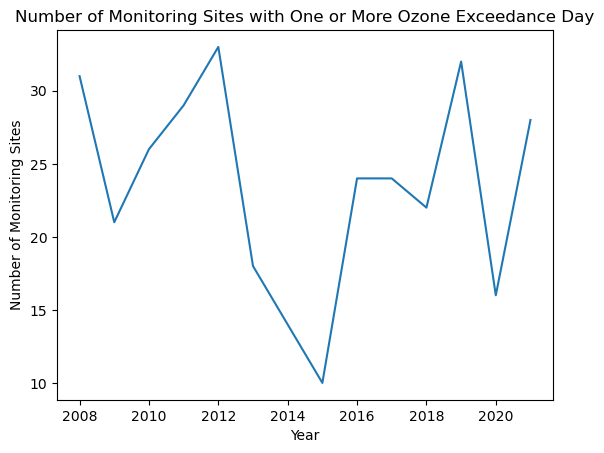

In [35]:
# data frame with years and number of sites per year
no_entries = [len(df08), len(df09), len(df10), len(df11), len(df12), len(df13), len(df14), len(df15), 
              len(df16), len(df16), len(df17), len(df18), len(df19), len(df20), len(df21)]
df_entries = pd.DataFrame(list(zip(years, no_entries)), columns=['Year','No_Entries'])
plt.plot(df_entries["Year"], df_entries["No_Entries"])
plt.xlabel("Year")
plt.ylabel("Number of Monitoring Sites")
plt.title("Number of Monitoring Sites with One or More Ozone Exceedance Day")
# plt.savefig("number of monitoring sites per year.png")
plt.show()

#### Plot of Ozone Exceedance Days versus Temp in Sequoia

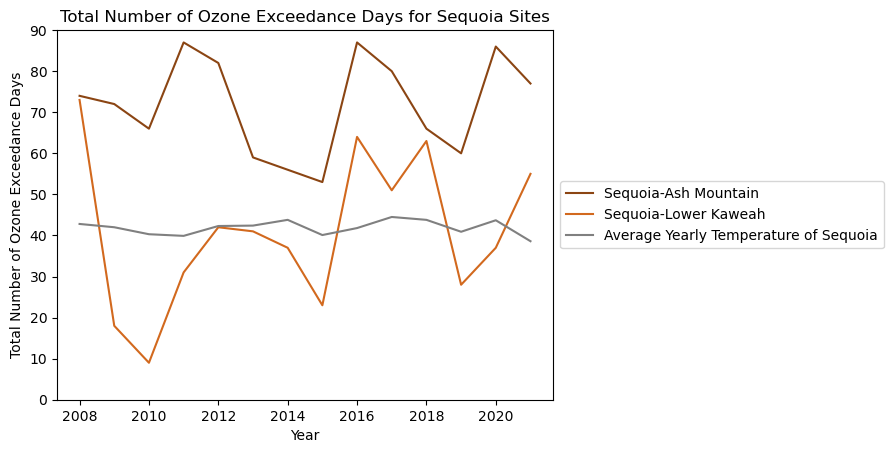

In [36]:
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Total"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["Total"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(seq_temp["Year"], seq_temp["Average Yearly Temp"], label = "Average Yearly Temperature of Sequoia", c = 'gray')
plt.ylim(0, 90)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Total Number of Ozone Exceedance Days for Sequoia Sites")
# plt.savefig("sequoia sites and temp.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Plot of Total Number of Ozone Exceedance Days for Sites

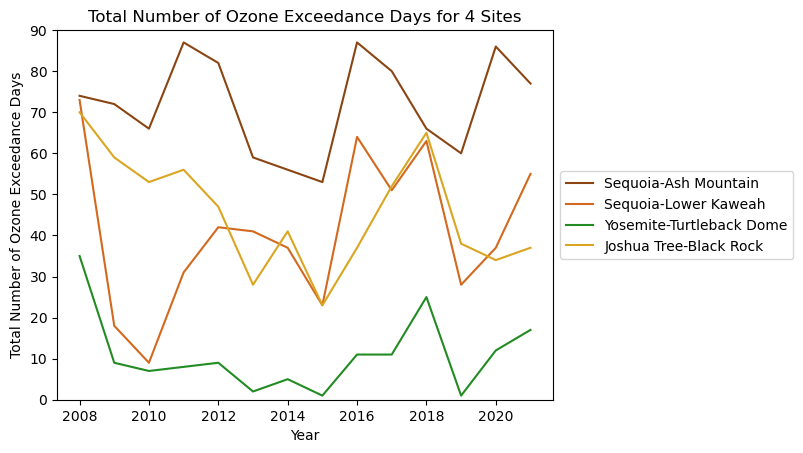

In [37]:
# plot total number of ozone exceedance days
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Total"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["Total"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Total"], label = "Yosemite-Turtleback Dome", c = 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Total"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.ylim(0, 90)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Total Number of Ozone Exceedance Days for 4 Sites")
plt.show()

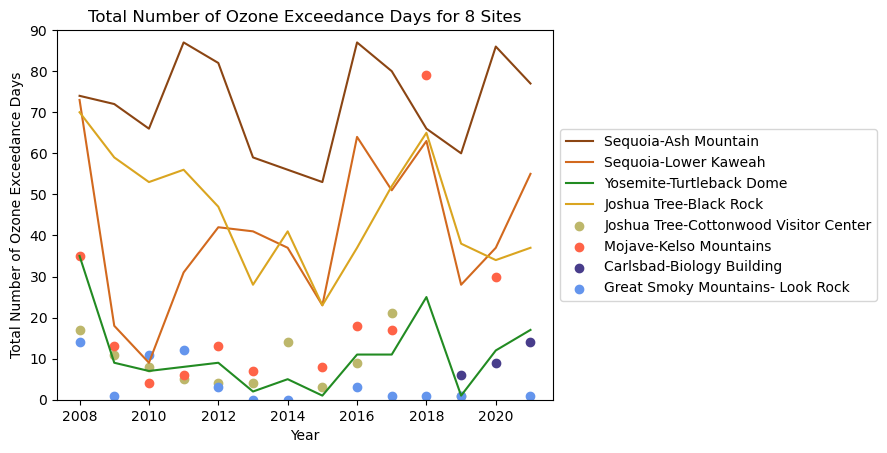

In [38]:
# plot total number of ozone exceedance days
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Total"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["Total"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Total"], label = "Yosemite-Turtleback Dome", c = 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Total"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.scatter(joshuatree_cottonwood["Year"], joshuatree_cottonwood["Total"], c = 'darkkhaki', 
            label = "Joshua Tree-Cottonwood Visitor Center")
plt.scatter(mojave["Year"], mojave["Total"], c = 'tomato', label = "Mojave-Kelso Mountains")
plt.scatter(carlsbad["Year"], carlsbad["Total"], c = 'darkslateblue', label = "Carlsbad-Biology Building")
plt.scatter(greatsmokymtn["Year"], greatsmokymtn["Total"], c = 'cornflowerblue', label = "Great Smoky Mountains- Look Rock")
plt.ylim(0, 90)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Total Number of Ozone Exceedance Days for 8 Sites")
# plt.savefig("total-8sites.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Plot of Daily maximum 8-hour average ozone concentration for all sites

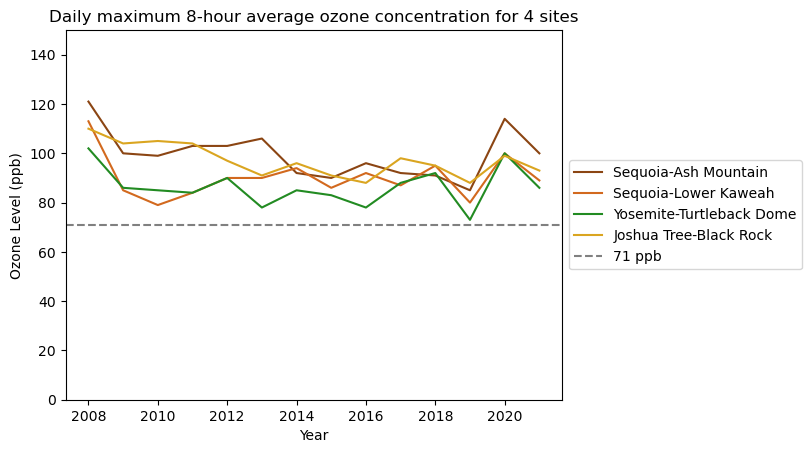

In [39]:
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Max8hr"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["Max8hr"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Max8hr"], label = "Yosemite-Turtleback Dome", c= 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Max8hr"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 150)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Daily maximum 8-hour average ozone concentration for 4 sites")
plt.show()

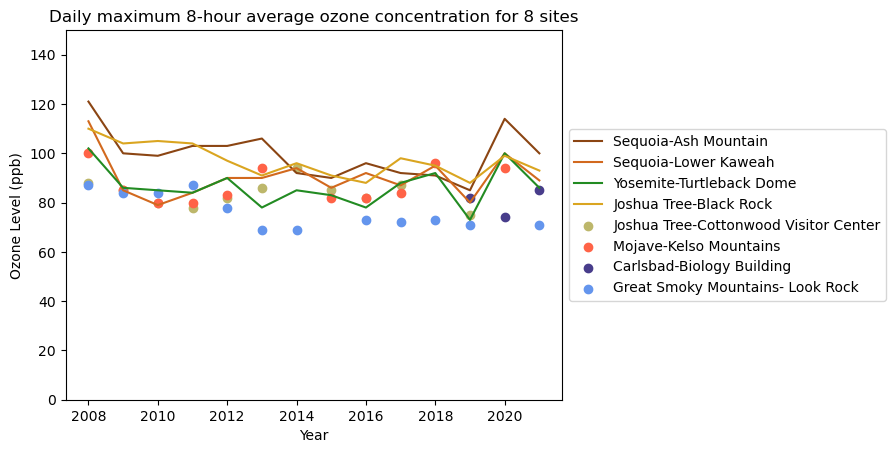

In [40]:
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Max8hr"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["Max8hr"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Max8hr"], label = "Yosemite-Turtleback Dome", c= 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Max8hr"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.scatter(joshuatree_cottonwood["Year"], joshuatree_cottonwood["Max8hr"], c = 'darkkhaki', 
            label = "Joshua Tree-Cottonwood Visitor Center")
plt.scatter(mojave["Year"], mojave["Max8hr"], c = 'tomato', label = "Mojave-Kelso Mountains")
plt.scatter(carlsbad["Year"], carlsbad["Max8hr"], c = 'darkslateblue', label = "Carlsbad-Biology Building")
plt.scatter(greatsmokymtn["Year"], greatsmokymtn["Max8hr"], c = 'cornflowerblue', label = "Great Smoky Mountains- Look Rock")
plt.ylim(0, 150)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Daily maximum 8-hour average ozone concentration for 8 sites")
# plt.savefig("max8hr-8sites.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Plot for Annual fourth-highest daily maximum 8-hour average ozone concentration for all sites

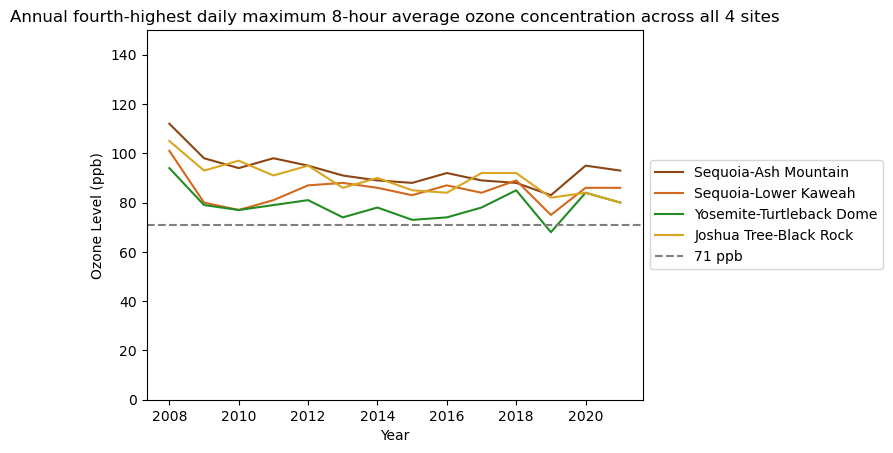

In [41]:
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["4thHi8hr"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["4thHi8hr"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["4thHi8hr"], label = "Yosemite-Turtleback Dome", c = 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["4thHi8hr"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 150)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Annual fourth-highest daily maximum 8-hour average ozone concentration across all 4 sites")
plt.show()

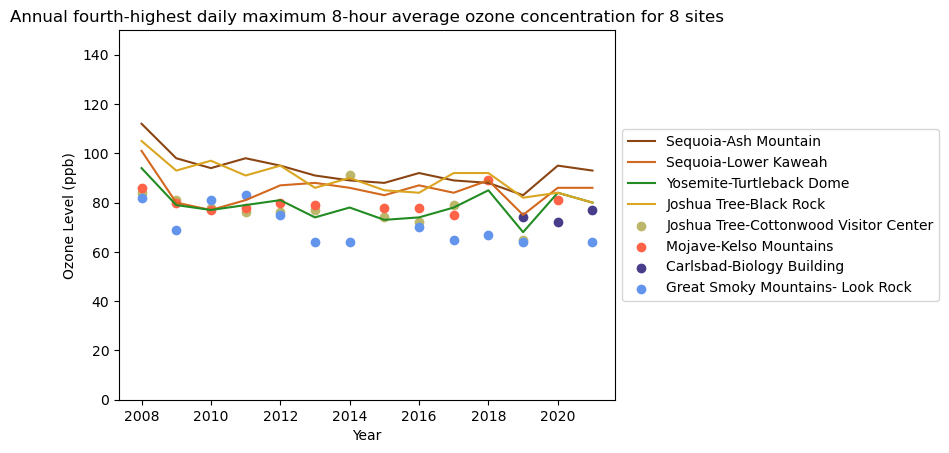

In [42]:
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["4thHi8hr"], label = "Sequoia-Ash Mountain", c = 'saddlebrown')
plt.plot(sequoia_lower["Year"], sequoia_lower["4thHi8hr"], label = "Sequoia-Lower Kaweah", c = 'chocolate')
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["4thHi8hr"], label = "Yosemite-Turtleback Dome", c = 'forestgreen')
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["4thHi8hr"], label = "Joshua Tree-Black Rock", c = 'goldenrod')
plt.scatter(joshuatree_cottonwood["Year"], joshuatree_cottonwood["4thHi8hr"], c = 'darkkhaki', 
            label = "Joshua Tree-Cottonwood Visitor Center")
plt.scatter(mojave["Year"], mojave["4thHi8hr"], c = 'tomato', label = "Mojave-Kelso Mountains")
plt.scatter(carlsbad["Year"], carlsbad["4thHi8hr"], c = 'darkslateblue', label = "Carlsbad-Biology Building")
plt.scatter(greatsmokymtn["Year"], greatsmokymtn["4thHi8hr"], c = 'cornflowerblue', label = "Great Smoky Mountains- Look Rock")
plt.ylim(0, 150)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Annual fourth-highest daily maximum 8-hour average ozone concentration for 8 sites")
# plt.savefig("4thHi8hr-8sites.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

In [43]:
# create dataframes for total, max8hr, 4thhi8hr
totals = [5, 1, 3, 3, 3, 1.5, 3, 4, 3, 4.5, 4, 1.5, 2.5, 2.5]
max8hr = [89.81, 81.86, 83.38, 82.72, 82.88, 80.28, 80.86, 83.7, 78.54, 80.64, 80.81, 76.06, 80.21, 78.61]
fourthhi8hr = [80.03, 73.53, 75.88, 75.48, 75.85, 73.89, 76.71, 76.4, 71.25, 72.91, 73.94, 70.13, 71.21, 71.54]
df_total = pd.DataFrame(list(zip(years, totals)), columns=['Year','Total'])
df_max8hr = pd.DataFrame(list(zip(years, max8hr)), columns=['Year','Max8hr'])
df_4thhi8hr = pd.DataFrame(list(zip(years, fourthhi8hr)), columns=['Year','4thHi8hr'])

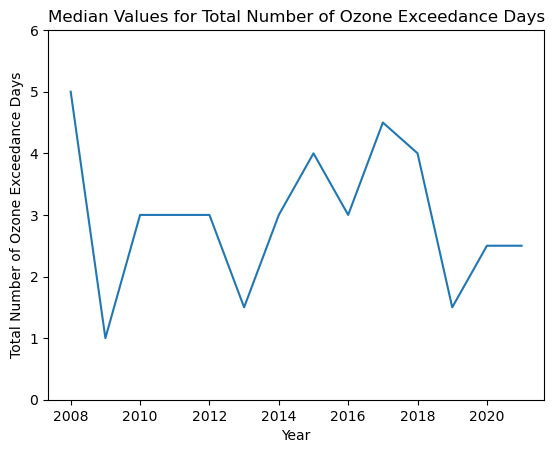

In [44]:
plt.plot(df_total["Year"], df_total["Total"], label = "Total Number of Ozone Exceedance Days")
plt.ylim(0, 6)
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Median Values for Total Number of Ozone Exceedance Days")
plt.show()

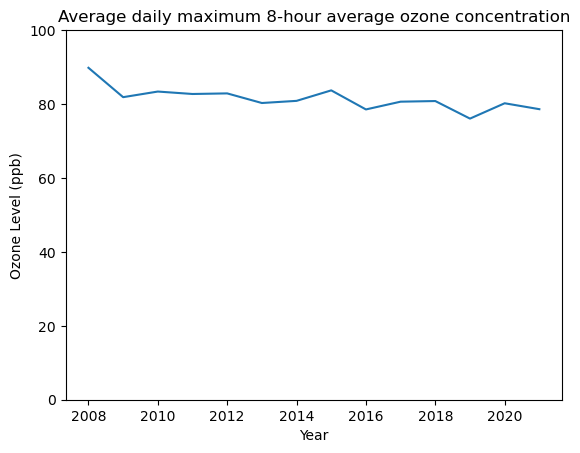

In [45]:
plt.plot(df_max8hr["Year"], df_max8hr["Max8hr"], label = "Max8hr")
plt.ylim(0, 100)
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Average daily maximum 8-hour average ozone concentration")
plt.show()

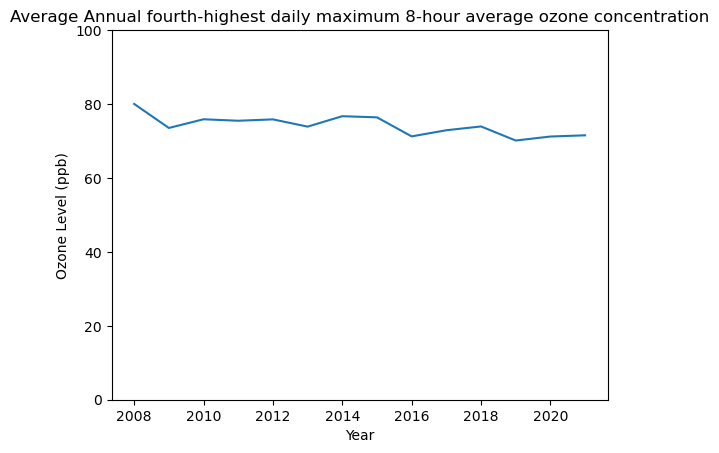

In [46]:
plt.plot(df_4thhi8hr["Year"], df_4thhi8hr["4thHi8hr"], label = "4thHi8hr")
plt.ylim(0, 100)
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Average Annual fourth-highest daily maximum 8-hour average ozone concentration")
plt.show()

### Test if data is stationary (Augmented Dickey-Fuller test)

In [47]:
from statsmodels.tsa.stattools import adfuller

#### Seqouia- Ash Mountain Site

In [48]:
adfsam1 = adfuller(sequoia_ashmtn["Total"])
print("Total Number of Ozone Exceedance Days")
print('ADF Statistic: %f' % adfsam1[0])
print('p-value: %f' % adfsam1[1])
print('Critical Values:')
for key, value in adfsam1[4].items():
 print('\t%s: %.3f' % (key, value))

Total Number of Ozone Exceedance Days
ADF Statistic: -2.786332
p-value: 0.060253
Critical Values:
	1%: -4.223
	5%: -3.189
	10%: -2.730


In [49]:
adfsam2 = adfuller(sequoia_ashmtn["Max8hr"])
print("Daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfsam2[0])
print('p-value: %f' % adfsam2[1])
print('Critical Values:')
for key, value in adfsam2[4].items():
 print('\t%s: %.3f' % (key, value))

Daily maximum 8-hour average ozone concentration
ADF Statistic: -3.951590
p-value: 0.001686
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [50]:
adfsam3 = adfuller(sequoia_ashmtn["4thHi8hr"])
print("Annual fourth-highest daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfsam3[0])
print('p-value: %f' % adfsam3[1])
print('Critical Values:')
for key, value in adfsam3[4].items():
 print('\t%s: %.3f' % (key, value))

Annual fourth-highest daily maximum 8-hour average ozone concentration
ADF Statistic: -4.319191
p-value: 0.000411
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


#### Yosemite- Turtleback Dome Site

In [51]:
adfy1 = adfuller(yosemite_turtleback["Total"])
print("Total Number of Ozone Exceedance Days")
print('ADF Statistic: %f' % adfy1[0])
print('p-value: %f' % adfy1[1])
print('Critical Values:')
for key, value in adfy1[4].items():
 print('\t%s: %.3f' % (key, value))

Total Number of Ozone Exceedance Days
ADF Statistic: -5.010323
p-value: 0.000021
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [52]:
adfy2 = adfuller(yosemite_turtleback["Max8hr"])
print("Daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfy2[0])
print('p-value: %f' % adfy2[1])
print('Critical Values:')
for key, value in adfy2[4].items():
 print('\t%s: %.3f' % (key, value))

Daily maximum 8-hour average ozone concentration
ADF Statistic: -1.018755
p-value: 0.746363
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [53]:
adfy3 = adfuller(yosemite_turtleback["4thHi8hr"])
print("Annual fourth-highest daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfy3[0])
print('p-value: %f' % adfy3[1])
print('Critical Values:')
for key, value in adfy3[4].items():
 print('\t%s: %.3f' % (key, value))

Annual fourth-highest daily maximum 8-hour average ozone concentration
ADF Statistic: -3.751147
p-value: 0.003449
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


#### Sequoia- Lower Kaweah Site

In [54]:
adfsl1 = adfuller(sequoia_lower["Total"])
print("Total Number of Ozone Exceedance Days")
print('ADF Statistic: %f' % adfsl1[0])
print('p-value: %f' % adfsl1[1])
print('Critical Values:')
for key, value in adfsl1[4].items():
 print('\t%s: %.3f' % (key, value))

Total Number of Ozone Exceedance Days
ADF Statistic: -0.744911
p-value: 0.834771
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [55]:
adfsl2 = adfuller(sequoia_lower["Max8hr"])
print("Daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfsl2[0])
print('p-value: %f' % adfsl2[1])
print('Critical Values:')
for key, value in adfsl2[4].items():
 print('\t%s: %.3f' % (key, value))

Daily maximum 8-hour average ozone concentration
ADF Statistic: -2.256941
p-value: 0.186232
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


In [56]:
adfsl3 = adfuller(sequoia_lower["4thHi8hr"])
print("Annual fourth-highest daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfsl3[0])
print('p-value: %f' % adfsl3[1])
print('Critical Values:')
for key, value in adfsl3[4].items():
 print('\t%s: %.3f' % (key, value))

Annual fourth-highest daily maximum 8-hour average ozone concentration
ADF Statistic: -1.853773
p-value: 0.354110
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


#### Joshua Tree- Black Rock Site

In [57]:
adfj1 = adfuller(joshuatree_blkrock["Total"])
print("Total Number of Ozone Exceedance Days")
print('ADF Statistic: %f' % adfj1[0])
print('p-value: %f' % adfj1[1])
print('Critical Values:')
for key, value in adfj1[4].items():
 print('\t%s: %.3f' % (key, value))

Total Number of Ozone Exceedance Days
ADF Statistic: -2.520246
p-value: 0.110626
Critical Values:
	1%: -4.069
	5%: -3.127
	10%: -2.702


In [58]:
adfj2 = adfuller(joshuatree_blkrock["Max8hr"])
print("Daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfj2[0])
print('p-value: %f' % adfj2[1])
print('Critical Values:')
for key, value in adfj2[4].items():
 print('\t%s: %.3f' % (key, value))

Daily maximum 8-hour average ozone concentration
ADF Statistic: 4.043388
p-value: 1.000000
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


In [59]:
adfj3 = adfuller(joshuatree_blkrock["4thHi8hr"])
print("Annual fourth-highest daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adfj3[0])
print('p-value: %f' % adfj3[1])
print('Critical Values:')
for key, value in adfj3[4].items():
 print('\t%s: %.3f' % (key, value))

Annual fourth-highest daily maximum 8-hour average ozone concentration
ADF Statistic: -2.115881
p-value: 0.238177
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


#### Generalized Models

In [60]:
adf1 = adfuller(df_total["Total"])
print("Median Values for Total Number of Ozone Exceedance Days")
print('ADF Statistic: %f' % adf1[0])
print('p-value: %f' % adf1[1])
print('Critical Values:')
for key, value in adf1[4].items():
 print('\t%s: %.3f' % (key, value))

Median Values for Total Number of Ozone Exceedance Days
ADF Statistic: -1.884209
p-value: 0.339526
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [61]:
adf2 = adfuller(df_max8hr["Max8hr"])
print("Average daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adf2[0])
print('p-value: %f' % adf2[1])
print('Critical Values:')
for key, value in adf2[4].items():
 print('\t%s: %.3f' % (key, value))

Average daily maximum 8-hour average ozone concentration
ADF Statistic: -0.175666
p-value: 0.941361
Critical Values:
	1%: -4.473
	5%: -3.290
	10%: -2.772


In [62]:
adf3 = adfuller(df_4thhi8hr["4thHi8hr"])
print("Average Annual fourth-highest daily maximum 8-hour average ozone concentration")
print('ADF Statistic: %f' % adf3[0])
print('p-value: %f' % adf3[1])
print('Critical Values:')
for key, value in adf3[4].items():
 print('\t%s: %.3f' % (key, value))

Average Annual fourth-highest daily maximum 8-hour average ozone concentration
ADF Statistic: 1.021634
p-value: 0.994489
Critical Values:
	1%: -4.665
	5%: -3.367
	10%: -2.803


In [63]:
# function for Weighted Mean Absolute Percentage Error (WMAPE)
def wmape(actual, forecast):
    # we take two series and calculate an output a wmape from it, not to be used in a grouping function

    # make a series called mape
    se_mape = abs(actual-forecast)/actual

    # get a float of the sum of the actual
    ft_actual_sum = actual.sum()

    # get a series of the multiple of the actual & the mape
    se_actual_prod_mape = actual * se_mape

    # summate the prod of the actual and the mape
    ft_actual_prod_mape_sum = se_actual_prod_mape.sum()

    # float: wmape of forecast
    ft_wmape_forecast = ft_actual_prod_mape_sum / ft_actual_sum

    # return a float
    return ft_wmape_forecast

#### Models for Sequoia- Ash Mountain Site

##### Number of Ozone Exceedance Days

In [64]:
x_trainsam1 = sequoia_ashmtn["Total"][:12]
x_testsam1 = sequoia_ashmtn["Total"][12:]
modelsam1 = ARIMA(x_trainsam1, order=(0, 1, 1)) 
resultssam1 = modelsam1.fit()
resultssam1.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   12
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -44.169
Date:                Thu, 04 Jan 2024   AIC                             92.339
Time:                        16:58:46   BIC                             93.135
Sample:                             0   HQIC                            91.837
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9954     10.998     -0.091      0.928     -22.551      20.560
sigma2       144.2744   1592.706      0.091      0.928   -2977.372    3265.921
===================================================================================
Ljung-Box (L1) (Q):                   0.47   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.49   Prob(JB):                         0.63
Heteroskedasticity (H):               1.88   Skew:                             0.29
Prob(H) (two-sided):                  0.56   Kurtosis:                         1.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [65]:
forecastsam1 = resultssam1.forecast(2)
rmsesam1 = sqrt(mean_squared_error(x_testsam1, forecastsam1))
print('Test RMSE: %.3f' % rmsesam1)

Test RMSE: 12.196


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [66]:
wmapesam1 = wmape(x_testsam1, forecastsam1)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesam1 * 100))

Weighted Mean Absolute Percent Error: 0.0%


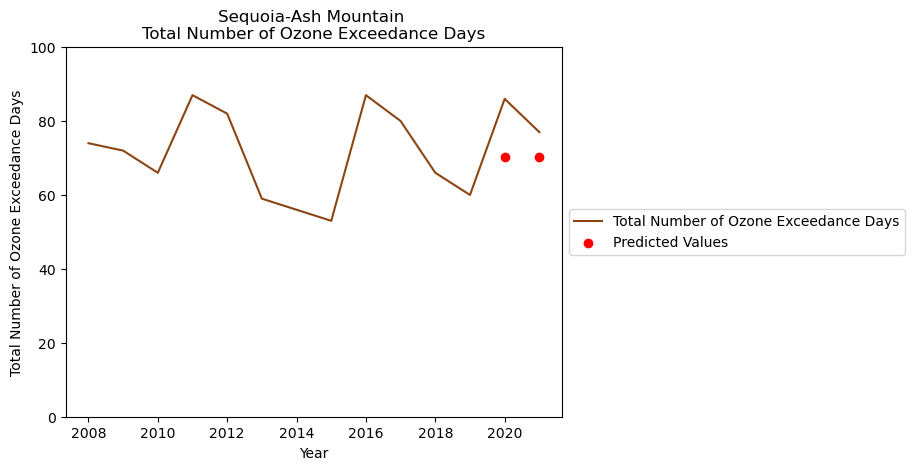

In [67]:
year_predict = [2020, 2021]
forecastsam1_lst = [70.164777, 70.164777]
df_forecastsam1 = pd.DataFrame(list(zip(year_predict, forecastsam1_lst)), columns=['Year','Total'])
# plot data versus predictions
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Total"], label = "Total Number of Ozone Exceedance Days", c = 'saddlebrown')
plt.scatter(df_forecastsam1["Year"], df_forecastsam1["Total"], c = "red", label = "Predicted Values")
plt.ylim(0, 100)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Sequoia-Ash Mountain \nTotal Number of Ozone Exceedance Days")
# plt.savefig("sequoia-ashmtn predict total.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Daily maximum 8-hour average ozone concentration

In [68]:
x_trainsam2 = sequoia_ashmtn["Max8hr"][:12]
x_testsam2 = sequoia_ashmtn["Max8hr"][12:]
modelsam2 = ARIMA(x_trainsam2, order=(0, 0, 0)) 
resultssam2 = modelsam2.fit()
resultssam2.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Max8hr   No. Observations:                   12
Model:                          ARIMA   Log Likelihood                 -43.598
Date:                Thu, 04 Jan 2024   AIC                             91.197
Time:                        16:58:59   BIC                             92.166
Sample:                             0   HQIC                            90.837
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         98.1667      3.258     30.130      0.000      91.781     104.553
sigma2        83.8054     35.919      2.333      0.020      13.405     154.206
===================================================================================
Ljung-Box (L1) (Q):                   1.19   Jarque-Bera (JB):                 2.17
Prob(Q):                              0.28   Prob(JB):                         0.34
Heteroskedasticity (H):               0.49   Skew:                             0.97
Prob(H) (two-sided):                  0.50   Kurtosis:                         3.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
forecastsam2 = resultssam2.forecast(2)
rmsesam2 = sqrt(mean_squared_error(x_testsam2, forecastsam2))
print('Test RMSE: %.3f' % rmsesam2)

Test RMSE: 11.271


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [70]:
wmapesam2 = wmape(x_testsam2, forecastsam2)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesam2 * 100))

Weighted Mean Absolute Percent Error: 0.0%


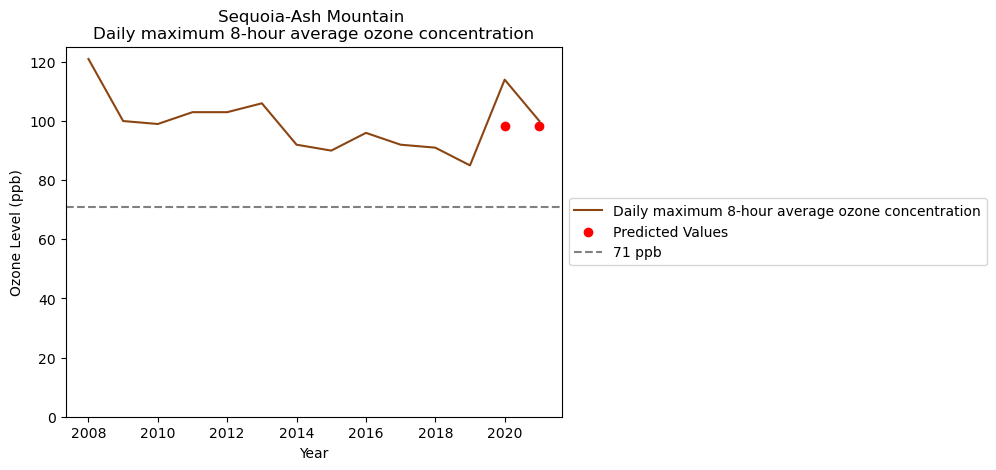

In [71]:
forecastsam2_lst = [98.166662, 98.166662]
df_forecastsam2 = pd.DataFrame(list(zip(year_predict, forecastsam2_lst)), columns=["Year","Max8hr"])
# plot data versus predictions
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["Max8hr"], label = "Daily maximum 8-hour average ozone concentration", c = 'saddlebrown')
plt.scatter(df_forecastsam2["Year"], df_forecastsam2["Max8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Sequoia-Ash Mountain \nDaily maximum 8-hour average ozone concentration")
# plt.savefig("sequoia-ashmtn predict max8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Annual fourth-highest daily maximum 8-hour average ozone concentration

In [72]:
x_trainsam3 = sequoia_ashmtn["4thHi8hr"][:12]
x_testsam3 = sequoia_ashmtn["4thHi8hr"][12:]
modelsam3 = ARIMA(x_trainsam3, order=(0, 0, 0)) 
resultssam3 = modelsam3.fit()
resultssam3.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               4thHi8hr   No. Observations:                   12
Model:                          ARIMA   Log Likelihood                 -40.528
Date:                Thu, 04 Jan 2024   AIC                             85.057
Time:                        16:59:14   BIC                             86.027
Sample:                             0   HQIC                            84.698
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         93.0833      2.796     33.290      0.000      87.603      98.564
sigma2        50.2423     20.690      2.428      0.015       9.691      90.794
===================================================================================
Ljung-Box (L1) (Q):                   2.01   Jarque-Bera (JB):                 4.81
Prob(Q):                              0.16   Prob(JB):                         0.09
Heteroskedasticity (H):               0.36   Skew:                             1.31
Prob(H) (two-sided):                  0.34   Kurtosis:                         4.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [73]:
forecastsam3 = resultssam3.forecast(2)
rmsesam3 = sqrt(mean_squared_error(x_testsam3, forecastsam3))
print('Test RMSE: %.3f' % rmsesam3)

Test RMSE: 1.357


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [74]:
wmapesam3 = wmape(x_testsam3, forecastsam3)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesam3 * 100))

Weighted Mean Absolute Percent Error: 0.0%


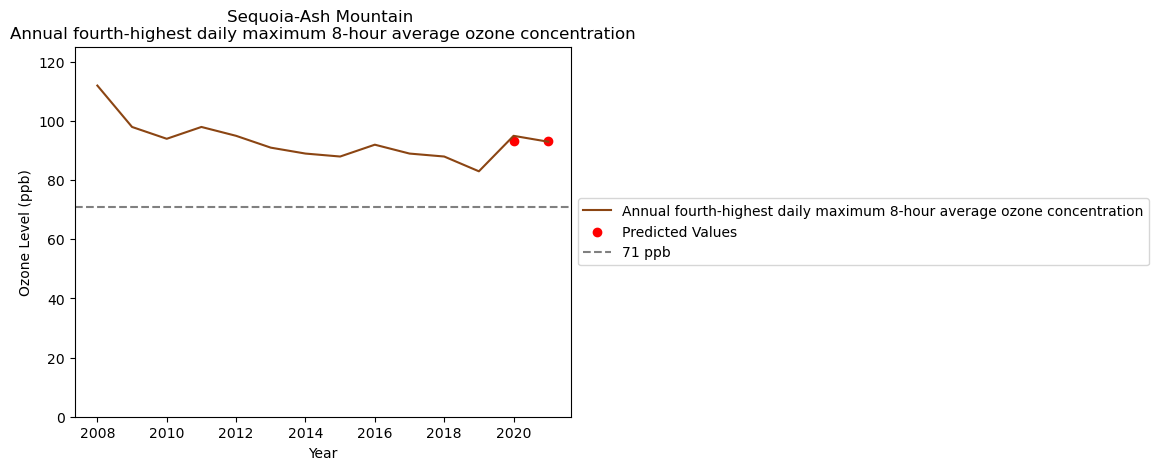

In [75]:
forecastsam3_lst = [93.083328, 93.083328]
df_forecastsam3 = pd.DataFrame(list(zip(year_predict, forecastsam3_lst)), columns=["Year","4thHi8hr"])
# plot data versus predictions
plt.plot(sequoia_ashmtn["Year"], sequoia_ashmtn["4thHi8hr"], label = "Annual fourth-highest daily maximum 8-hour average ozone concentration", c = 'saddlebrown')
plt.scatter(df_forecastsam3["Year"], df_forecastsam3["4thHi8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Sequoia-Ash Mountain \nAnnual fourth-highest daily maximum 8-hour average ozone concentration")
# plt.savefig("sequoia-ashmtn predict 4thHi.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Models for Yosemite- Turtleback Dome Site

##### Total Number of Ozone Exceedance Days

In [76]:
x_trainy1 = yosemite_turtleback["Total"][:12]
x_testy1 = yosemite_turtleback["Total"][12:]
modely1 = ARIMA(x_trainy1, order=(1, 0, 0)) 
resultsy1 = modely1.fit()
resultsy1.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   12
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -44.204
Date:                Thu, 04 Jan 2024   AIC                             94.409
Time:                        16:59:30   BIC                             95.863
Sample:                             0   HQIC                            93.870
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.2250      4.485      2.280      0.023       1.435      19.015
ar.L1         -0.0912      0.664     -0.137      0.891      -1.392       1.209
sigma2        92.6479     51.416      1.802      0.072      -8.125     193.421
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 4.83
Prob(Q):                              0.85   Prob(JB):                         0.09
Heteroskedasticity (H):               0.45   Skew:                             1.44
Prob(H) (two-sided):                  0.46   Kurtosis:                         4.15
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
forecasty1 = resultsy1.forecast(2)
rmsey1 = sqrt(mean_squared_error(x_testy1, forecasty1))
print('Test RMSE: %.3f' % rmsey1)

Test RMSE: 4.890


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
wmapey1 = wmape(x_testy1, forecasty1)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapey1 * 100))

Weighted Mean Absolute Percent Error: 0.0%


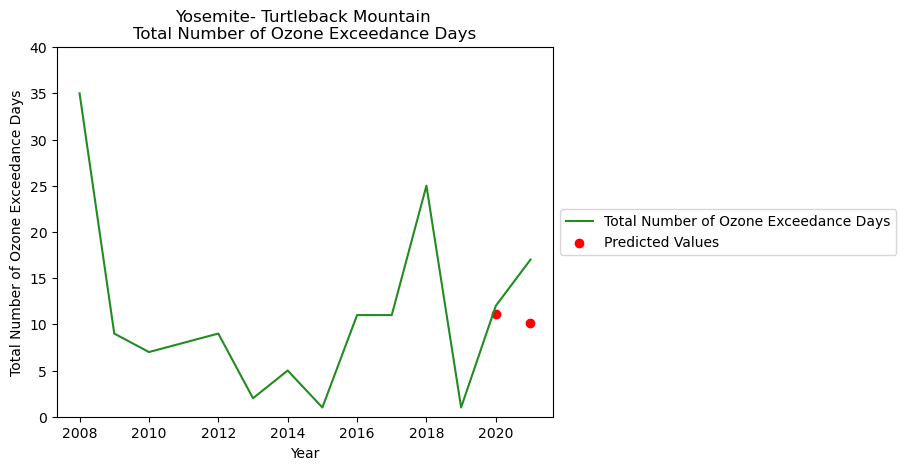

In [79]:
forecasty1_lst = [11.066376, 10.148267]
df_forecasty1 = pd.DataFrame(list(zip(year_predict, forecasty1_lst)), columns=["Year","Total"])
# plot data versus predictions
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Total"], label = "Total Number of Ozone Exceedance Days", c = 'forestgreen')
plt.scatter(df_forecasty1["Year"], df_forecasty1["Total"], c = "red", label = "Predicted Values")
plt.ylim(0, 40)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Yosemite- Turtleback Mountain \nTotal Number of Ozone Exceedance Days")
# plt.savefig("yose-turtleback predict total.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Daily maximum 8-hour average ozone concentration

In [80]:
x_trainy2 = yosemite_turtleback["Max8hr"][:12]
x_testy2 = yosemite_turtleback["Max8hr"][12:]
modely2 = ARIMA(x_trainy2, order=(1, 0, 1)) 
resultsy2 = modely2.fit()
resultsy2.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Max8hr   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -40.192
Date:                Thu, 04 Jan 2024   AIC                             88.384
Time:                        16:59:47   BIC                             90.324
Sample:                             0   HQIC                            87.666
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         85.0618      1.735     49.016      0.000      81.660      88.463
ar.L1         -0.1185      1.105     -0.107      0.915      -2.285       2.048
ma.L1         -0.3565      1.178     -0.303      0.762      -2.666       1.953
sigma2        46.5911     25.989      1.793      0.073      -4.346      97.528
===================================================================================
Ljung-Box (L1) (Q):                   0.50   Jarque-Bera (JB):                 0.57
Prob(Q):                              0.48   Prob(JB):                         0.75
Heteroskedasticity (H):               0.65   Skew:                             0.49
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
forecasty2 = resultsy2.forecast(2)
rmsey2 = sqrt(mean_squared_error(x_testy2, forecasty2))
print('Test RMSE: %.3f' % rmsey2)

Test RMSE: 7.419


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [82]:
wmapey2 = wmape(x_testy2, forecasty2)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapey2 * 100))

Weighted Mean Absolute Percent Error: 0.0%


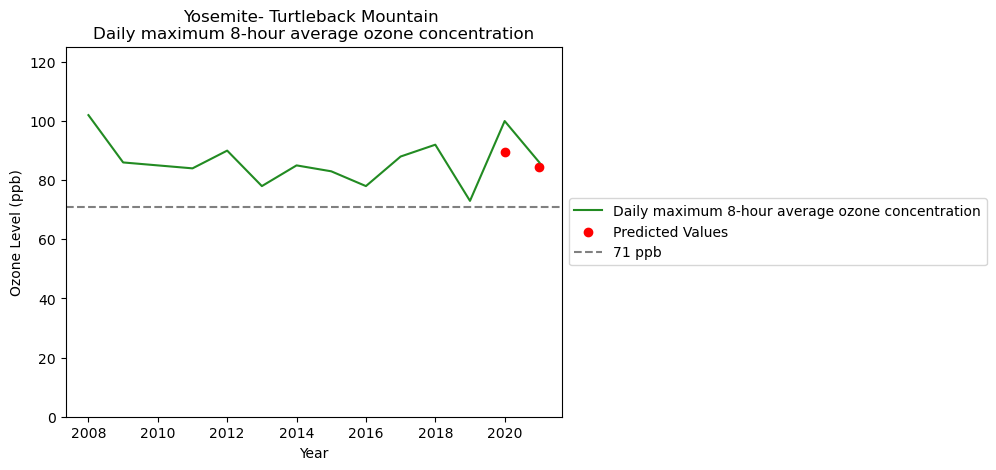

In [83]:
forecasty2_lst = [89.612174, 84.522422]
df_forecasty2 = pd.DataFrame(list(zip(year_predict, forecasty2_lst)), columns=["Year","Max8hr"])
# plot data versus predictions
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["Max8hr"], label = "Daily maximum 8-hour average ozone concentration", c = 'forestgreen')
plt.scatter(df_forecasty2["Year"], df_forecasty2["Max8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Yosemite- Turtleback Mountain \nDaily maximum 8-hour average ozone concentration")
# plt.savefig("yose-turtleback predict max8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Annual fourth-highest daily maximum 8-hour average ozone concentration

In [84]:
x_trainy3 = yosemite_turtleback["4thHi8hr"][:12]
x_testy3 = yosemite_turtleback["4thHi8hr"][12:]
modely3 = ARIMA(x_trainy3, order=(1, 0, 1)) 
resultsy3 = modely3.fit()
resultsy3.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               4thHi8hr   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -38.882
Date:                Thu, 04 Jan 2024   AIC                             85.765
Time:                        17:00:01   BIC                             87.704
Sample:                             0   HQIC                            85.047
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.1656      2.648     29.520      0.000      72.976      83.355
ar.L1         -0.0830      3.329     -0.025      0.980      -6.608       6.442
ma.L1         -0.2183      3.366     -0.065      0.948      -6.815       6.378
sigma2        37.8970     21.945      1.727      0.084      -5.114      80.908
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                 1.56
Prob(Q):                              0.59   Prob(JB):                         0.46
Heteroskedasticity (H):               0.56   Skew:                             0.86
Prob(H) (two-sided):                  0.59   Kurtosis:                         3.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [85]:
forecasty3 = resultsy3.forecast(2)
rmsey3 = sqrt(mean_squared_error(x_testy3, forecasty3))
print('Test RMSE: %.3f' % rmsey3)

Test RMSE: 2.690


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [86]:
wmapey3 = wmape(x_testy3, forecasty3)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapey3 * 100))

Weighted Mean Absolute Percent Error: 0.0%


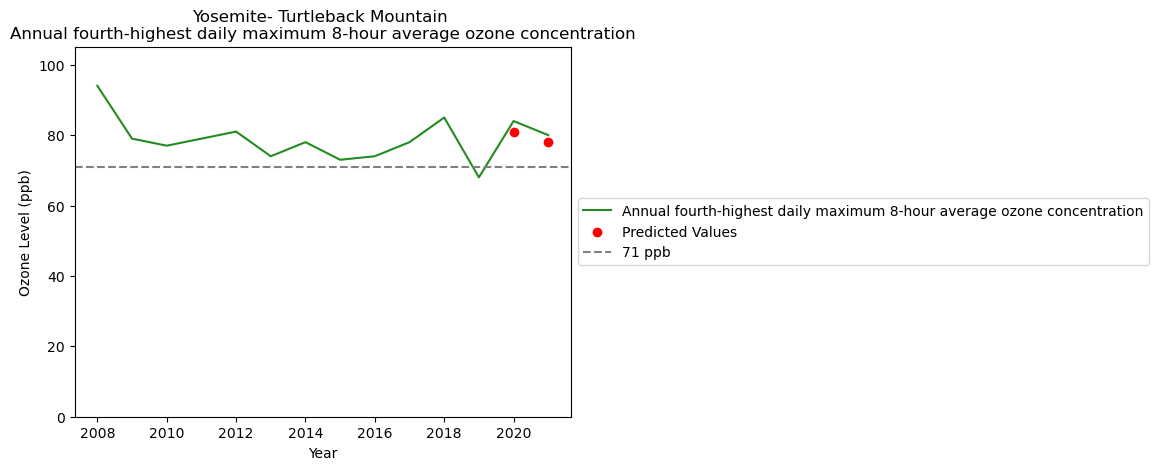

In [87]:
forecasty3_lst = [80.797796, 77.947080]
df_forecasty3 = pd.DataFrame(list(zip(year_predict, forecasty3_lst)), columns=["Year","4thHi8hr"])
# plot data versus predictions
plt.plot(yosemite_turtleback["Year"], yosemite_turtleback["4thHi8hr"], label = "Annual fourth-highest daily maximum 8-hour average ozone concentration", c = 'forestgreen')
plt.scatter(df_forecasty3["Year"], df_forecasty3["4thHi8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 105)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Yosemite- Turtleback Mountain \nAnnual fourth-highest daily maximum 8-hour average ozone concentration")
# plt.savefig("yose-turtleback predict 4thHi8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Models for Sequoia- Lower Kaweah Site

##### Total Number of Ozone Exceedance Days

In [88]:
x_trainsl1 = sequoia_lower["Total"][:12]
x_testsl1 = sequoia_lower["Total"][12:]
modelsl1 = ARIMA(x_trainsl1, order=(2, 0, 0)) 
resultssl1 = modelsl1.fit()
resultssl1.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   12
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -51.910
Date:                Thu, 04 Jan 2024   AIC                            111.820
Time:                        17:00:16   BIC                            113.760
Sample:                             0   HQIC                           111.102
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6715      7.322      5.418      0.000      25.320      54.023
ar.L1          0.1414      0.356      0.397      0.691      -0.556       0.839
ar.L2         -0.3329      0.373     -0.893      0.372      -1.063       0.397
sigma2       328.0947    259.981      1.262      0.207    -181.458     837.647
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 1.38
Prob(Q):                              0.52   Prob(JB):                         0.50
Heteroskedasticity (H):               0.87   Skew:                             0.69
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
forecastsl1 = resultssl1.forecast(2)
rmsesl1 = sqrt(mean_squared_error(x_testsl1, forecastsl1))
print('Test RMSE: %.3f' % rmsesl1)

Test RMSE: 10.215


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [90]:
wmapesl1 = wmape(x_testsl1, forecastsl1)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesl1 * 100))

Weighted Mean Absolute Percent Error: 0.0%


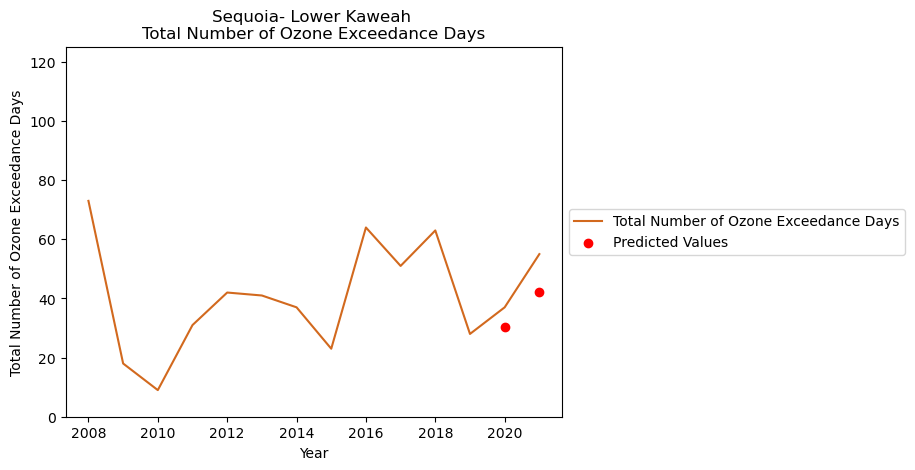

In [91]:
forecastsl1_lst = [30.253511, 42.225400]
df_forecastsl1 = pd.DataFrame(list(zip(year_predict, forecastsl1_lst)), columns=["Year","Total"])
# plot data versus predictions
plt.plot(sequoia_lower["Year"], sequoia_lower["Total"], label = "Total Number of Ozone Exceedance Days", c = 'chocolate')
plt.scatter(df_forecastsl1["Year"], df_forecastsl1["Total"], c = "red", label = "Predicted Values")
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Sequoia- Lower Kaweah \nTotal Number of Ozone Exceedance Days")
# plt.savefig("seq-lower predict total.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Daily maximum 8-hour average ozone concentration

In [92]:
x_trainsl2 = sequoia_lower["Max8hr"][:12]
x_testsl2 = sequoia_lower["Max8hr"][12:]
modelsl2 = ARIMA(x_trainsl2, order=(1, 0, 1)) 
resultssl2 = modelsl2.fit()
resultssl2.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/state

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Max8hr   No. Observations:                   12
Model:                 ARIMA(1, 0, 1)   Log Likelihood                 -40.590
Date:                Thu, 04 Jan 2024   AIC                             89.179
Time:                        17:00:30   BIC                             91.119
Sample:                             0   HQIC                            88.461
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         88.9230      0.913     97.397      0.000      87.134      90.712
ar.L1          0.0665      0.547      0.121      0.903      -1.006       1.139
ma.L1         -0.9998    838.757     -0.001      0.999   -1644.934    1642.934
sigma2        41.4150   3.47e+04      0.001      0.999    -6.8e+04    6.81e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                 4.17
Prob(Q):                              0.32   Prob(JB):                         0.12
Heteroskedasticity (H):               0.12   Skew:                             1.29
Prob(H) (two-sided):                  0.07   Kurtosis:                         4.30
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [93]:
forecastsl2 = resultssl2.forecast(2)
rmsesl2 = sqrt(mean_squared_error(x_testsl2, forecastsl2))
print('Test RMSE: %.3f' % rmsesl2)

Test RMSE: 5.803


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [94]:
wmapesl2 = wmape(x_testsl2, forecastsl2)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesl2 * 100))

Weighted Mean Absolute Percent Error: 0.0%


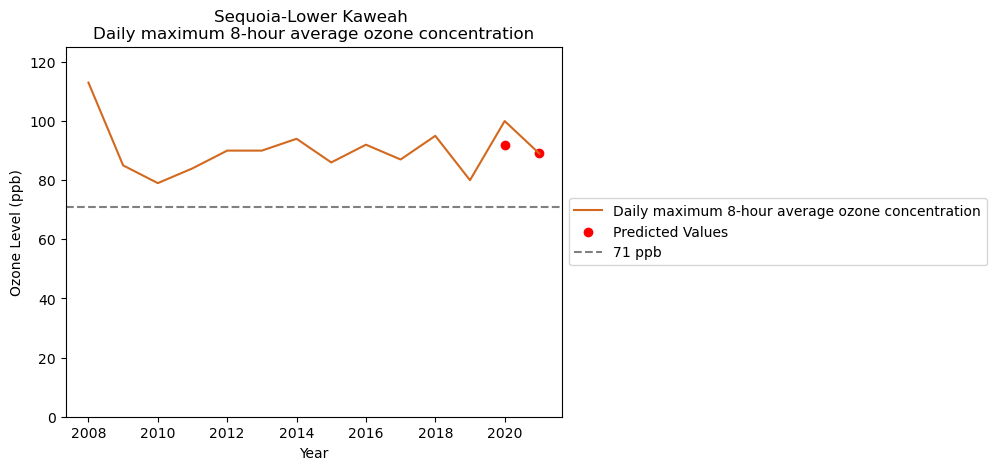

In [95]:
forecastsl2_lst = [91.794762, 89.113849]
df_forecastsl2 = pd.DataFrame(list(zip(year_predict, forecastsl2_lst)), columns=["Year","Max8hr"])
# plot data versus predictions
plt.plot(sequoia_lower["Year"], sequoia_lower["Max8hr"], label = "Daily maximum 8-hour average ozone concentration", c = 'chocolate')
plt.scatter(df_forecastsl2["Year"], df_forecastsl2["Max8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Sequoia-Lower Kaweah \nDaily maximum 8-hour average ozone concentration")
# plt.savefig("sequoia-lower predict max8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Annual fourth-highest daily maximum 8-hour average ozone concentration

In [96]:
x_trainsl3 = sequoia_lower["4thHi8hr"][:12]
x_testsl3 = sequoia_lower["4thHi8hr"][12:]
modelsl3 = ARIMA(x_trainsl3, order=(1, 0, 2)) 
resultssl3 = modelsl3.fit()
resultssl3.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/state

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               4thHi8hr   No. Observations:                   12
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -37.004
Date:                Thu, 04 Jan 2024   AIC                             84.008
Time:                        17:00:43   BIC                             86.433
Sample:                             0   HQIC                            83.111
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.6755      0.734    115.407      0.000      83.237      86.114
ar.L1         -0.2637      1.697     -0.155      0.876      -3.590       3.062
ma.L1         -0.5500    894.929     -0.001      1.000   -1754.579    1753.479
ma.L2         -0.4498    402.513     -0.001      0.999    -789.361     788.462
sigma2        22.9591   2.05e+04      0.001      0.999   -4.02e+04    4.03e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 2.30
Prob(Q):                              0.76   Prob(JB):                         0.32
Heteroskedasticity (H):               0.30   Skew:                             0.97
Prob(H) (two-sided):                  0.27   Kurtosis:                         3.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [97]:
forecastsl3 = resultssl3.forecast(2)
rmsesl3 = sqrt(mean_squared_error(x_testsl3, forecastsl3))
print('Test RMSE: %.3f' % rmsesl3)

Test RMSE: 1.205


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [98]:
wmapesl3 = wmape(x_testsl3, forecastsl3)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapesl3 * 100))

Weighted Mean Absolute Percent Error: 0.0%


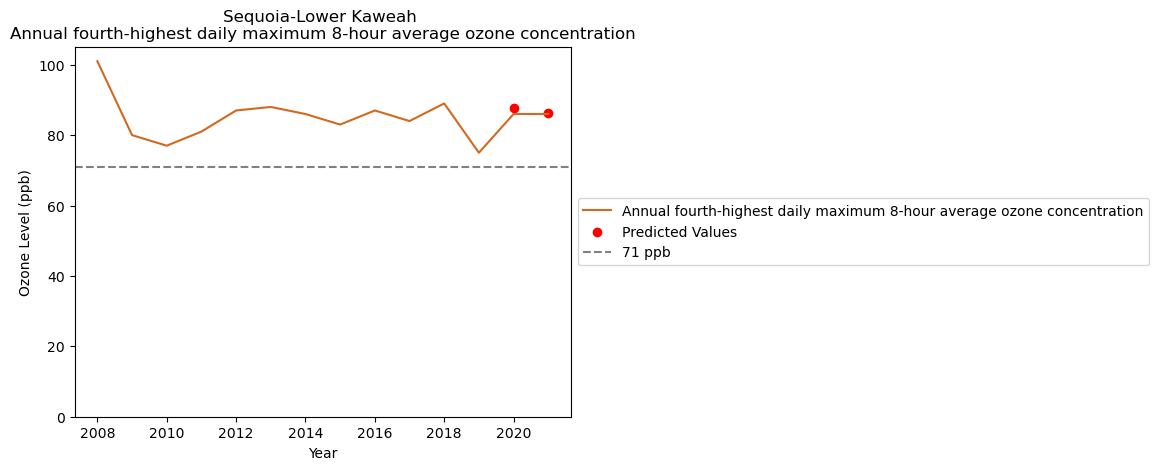

In [99]:
forecastsl3_lst = [87.686714, 86.244721]
df_forecastsl3 = pd.DataFrame(list(zip(year_predict, forecastsl3_lst)), columns=['Year','4thHi8hr'])
plt.plot(sequoia_lower["Year"], sequoia_lower["4thHi8hr"], label = "Annual fourth-highest daily maximum 8-hour average ozone concentration", c = 'chocolate')
plt.scatter(df_forecastsl3["Year"], df_forecastsl3["4thHi8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 105)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Sequoia-Lower Kaweah \nAnnual fourth-highest daily maximum 8-hour average ozone concentration")
# plt.savefig("sequoia-lowerkaweah predict 4thHi8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Models for Joshua Tree- Black Rock Site

##### Total Number of Ozone Exceedance Days

In [100]:
x_trainj1 = joshuatree_blkrock["Total"][:12]
x_testj1 = joshuatree_blkrock["Total"][12:]
modelj1 = ARIMA(x_trainj1, order=(1, 1, 1)) 
resultsj1 = modelj1.fit()
resultsj1.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                   12
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -44.755
Date:                Thu, 04 Jan 2024   AIC                             95.510
Time:                        17:00:56   BIC                             96.704
Sample:                             0   HQIC                            94.758
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5271      0.450      1.173      0.241      -0.354       1.408
ma.L1         -0.8632      0.533     -1.620      0.105      -1.908       0.181
sigma2       191.9732    131.404      1.461      0.144     -65.574     449.520
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 0.76
Prob(Q):                              0.69   Prob(JB):                         0.68
Heteroskedasticity (H):               2.91   Skew:                             0.09
Prob(H) (two-sided):                  0.33   Kurtosis:                         1.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
forecastj1 = resultsj1.forecast(2)
rmsej1 = sqrt(mean_squared_error(x_testj1, forecastj1))
print('Test RMSE: %.3f' % rmsej1)

Test RMSE: 7.101


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [102]:
wmapej1 = wmape(x_testj1, forecastj1)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapej1 * 100))

Weighted Mean Absolute Percent Error: 10.739060973003374%


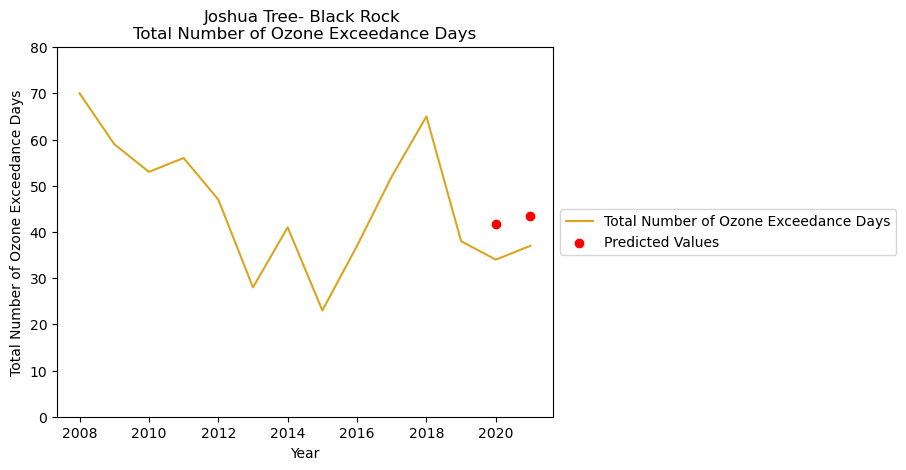

In [103]:
forecastj1_lst = [41.624733, 43.535321]
df_forecastj1 = pd.DataFrame(list(zip(year_predict, forecastj1_lst)), columns=["Year","Total"])
# plot data versus predictions
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Total"], label = "Total Number of Ozone Exceedance Days", c = 'goldenrod')
plt.scatter(df_forecastj1["Year"], df_forecastj1["Total"], c = "red", label = "Predicted Values")
plt.ylim(0, 80)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Joshua Tree- Black Rock \nTotal Number of Ozone Exceedance Days")
# plt.savefig("jt-blkrock predict total.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Daily maximum 8-hour average ozone concentration

In [104]:
x_trainj2 = joshuatree_blkrock["Max8hr"][:12]
x_testj2 = joshuatree_blkrock["Max8hr"][12:]
modelj2 = ARIMA(x_trainj2, order=(0, 0, 0)) 
resultsj2 = modelj2.fit()
resultsj2.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Max8hr   No. Observations:                   12
Model:                          ARIMA   Log Likelihood                 -40.194
Date:                Thu, 04 Jan 2024   AIC                             84.389
Time:                        17:01:13   BIC                             85.358
Sample:                             0   HQIC                            84.029
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.2500      2.076     46.854      0.000      93.182     101.318
sigma2        47.5208     29.908      1.589      0.112     -11.097     106.139
===================================================================================
Ljung-Box (L1) (Q):                   3.58   Jarque-Bera (JB):                 0.74
Prob(Q):                              0.06   Prob(JB):                         0.69
Heteroskedasticity (H):               0.56   Skew:                             0.27
Prob(H) (two-sided):                  0.59   Kurtosis:                         1.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [105]:
forecastj2 = resultsj2.forecast(2)
rmsej2 = sqrt(mean_squared_error(x_testj2, forecastj2))
print('Test RMSE: %.3f' % rmsej2)

Test RMSE: 3.250


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [106]:
wmapej2 = wmape(x_testj2, forecastj2)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapej2 * 100))

Weighted Mean Absolute Percent Error: 0.9114608943506722%


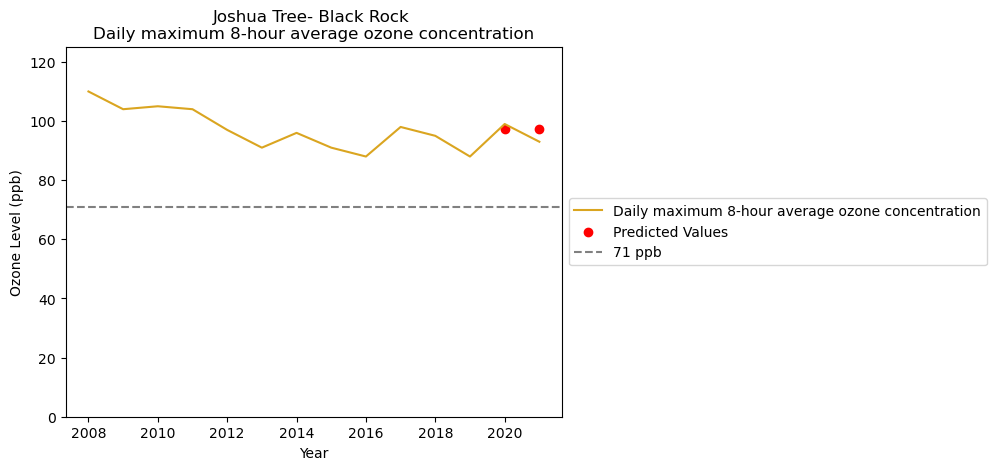

In [107]:
forecastj2_lst = [97.249995, 97.249995]
df_forecastj2 = pd.DataFrame(list(zip(year_predict, forecastj2_lst)), columns=["Year","Max8hr"])
# plot data versus predictions
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["Max8hr"], label = "Daily maximum 8-hour average ozone concentration", c = 'goldenrod')
plt.scatter(df_forecastj2["Year"], df_forecastj2["Max8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 125)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Joshua Tree- Black Rock \nDaily maximum 8-hour average ozone concentration")
# plt.savefig("jt-blkrock predict max8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

##### Annual fourth-highest daily maximum 8-hour average ozone concentration

In [108]:
x_trainj3 = joshuatree_blkrock["4thHi8hr"][:12]
x_testj3 = joshuatree_blkrock["4thHi8hr"][12:]
modelj3 = ARIMA(x_trainj3, order=(1, 1, 0)) 
resultsj3 = modelj3.fit()
resultsj3.summary()

/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               4thHi8hr   No. Observations:                   12
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -35.038
Date:                Thu, 04 Jan 2024   AIC                             74.076
Time:                        17:01:27   BIC                             74.872
Sample:                             0   HQIC                            73.574
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6199      0.419     -1.481      0.139      -1.440       0.200
sigma2        32.7445     22.471      1.457      0.145     -11.298      76.787
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.48
Prob(Q):                              0.93   Prob(JB):                         0.79
Heteroskedasticity (H):               1.73   Skew:                             0.45
Prob(H) (two-sided):                  0.61   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [109]:
forecastj3 = resultsj3.forecast(2)
rmsej3 = sqrt(mean_squared_error(x_testj3, forecastj3))
print('Test RMSE: %.3f' % rmsej3)

Test RMSE: 4.278


/Users/gillian/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [110]:
wmapej3 = wmape(x_testj3, forecastj3)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmapej3 * 100))

Weighted Mean Absolute Percent Error: 2.560337541886955%


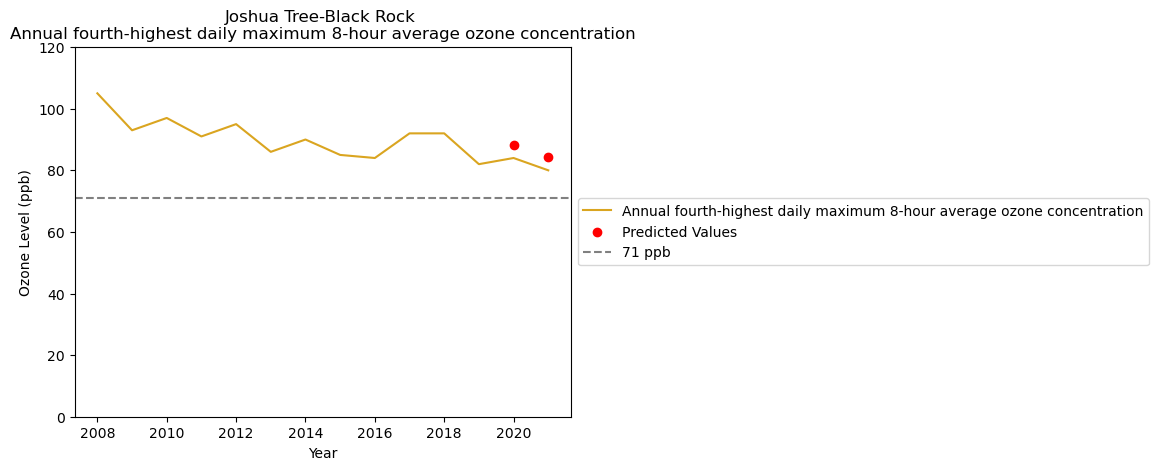

In [111]:
forecastj3_lst = [88.198954, 84.356251]
df_forecastj3 = pd.DataFrame(list(zip(year_predict, forecastj3_lst)), columns=['Year','4thHi8hr'])
plt.plot(joshuatree_blkrock["Year"], joshuatree_blkrock["4thHi8hr"], label = "Annual fourth-highest daily maximum 8-hour average ozone concentration", c = 'goldenrod')
plt.scatter(df_forecastj3["Year"], df_forecastj3["4thHi8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 120)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Joshua Tree-Black Rock \nAnnual fourth-highest daily maximum 8-hour average ozone concentration")
# plt.savefig("jt-blkrock predict 4thHi8hr.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Model for Total Number of Ozone Exceedance Days (median for all sites)

In [112]:
x_train1 = df_total["Total"][:12]
x_test1 = df_total["Total"][12:]
model1 = pm.auto_arima(x_train1, d=None, test='adf', start_p=0, start_q=0, max_p=12, max_q=12, 
                       D=None, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model1.summary())
results1 = model1.fit(x_train1)

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=49.802, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=49.475, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=49.094, Time=0.03 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=48.752, Time=0.04 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=50.711, Time=0.04 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=50.722, Time=0.05 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.627 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   12
Model:               SARIMAX(3, 2, 0)   Log Likelihood                 -20.376
Date:          

In [113]:
forecast1 = model1.predict(n_periods=2)
rmse1 = sqrt(mean_squared_error(x_test1, forecast1))
print('Test RMSE: %.3f' % rmse1)

Test RMSE: 0.265


In [114]:
wmape1 = wmape(x_test1, forecast1)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmape1 * 100))

Weighted Mean Absolute Percent Error: 9.789601153614536%


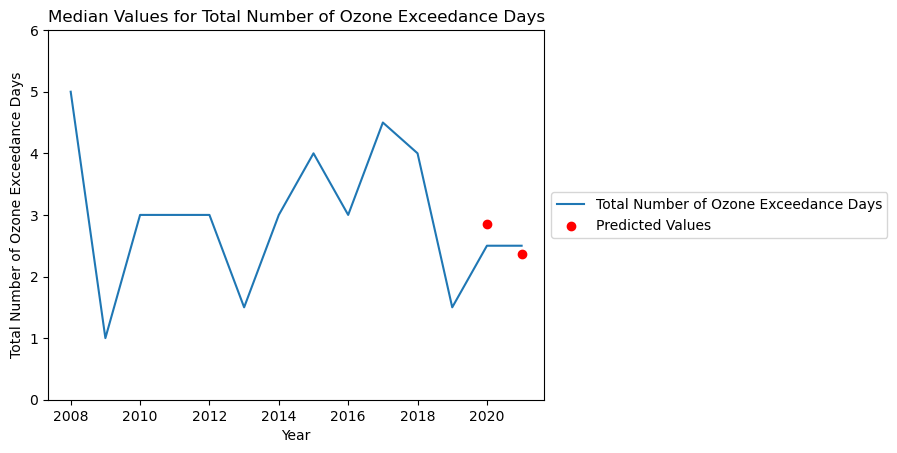

In [115]:
forecast1_lst = [2.847436, 2.357956]
df_forecast1 = pd.DataFrame(list(zip(year_predict, forecast1_lst)), columns=['Year','Total'])
# plot data versus predictions
plt.plot(df_total["Year"], df_total["Total"], label = "Total Number of Ozone Exceedance Days")
plt.scatter(df_forecast1["Year"], df_forecast1["Total"], c = "red", label = "Predicted Values")
plt.ylim(0, 6)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Total Number of Ozone Exceedance Days")
plt.title("Median Values for Total Number of Ozone Exceedance Days")
# plt.savefig("total-model1.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Model for Daily maximum 8-hour average ozone concentration (average of all sites)

In [116]:
x_train2 = df_max8hr["Max8hr"][:12]
x_test2 = df_max8hr["Max8hr"][12:]
model2 = ARIMA(x_train2, order=(2, 1, 1)) 
results2 = model2.fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Max8hr   No. Observations:                   12
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -27.208
Date:                Thu, 04 Jan 2024   AIC                             62.416
Time:                        17:01:57   BIC                             64.007
Sample:                             0   HQIC                            61.413
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0525      0.877     -1.200      0.230      -2.771       0.666
ar.L2         -0.5946      0.488     -1.218      0.223      -1.552       0.362
ma.L1          0.0916      1.046      0.088      0.930      -1.958       2.141
sigma2         7.3482      5.867      1.252      0.210      -4.151      18.847
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                 0.50
Prob(Q):                              0.76   Prob(JB):                         0.78
Heteroskedasticity (H):               0.36   Skew:                             0.49
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [117]:
forecast2 = results2.forecast(2)
rmse2 = sqrt(mean_squared_error(x_test2, forecast2))
print('Test RMSE: %.3f' % rmse2)

Test RMSE: 0.318


In [118]:
wmape2 = wmape(x_test2, forecast2)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmape2 * 100))

Weighted Mean Absolute Percent Error: 0.3033294119977305%


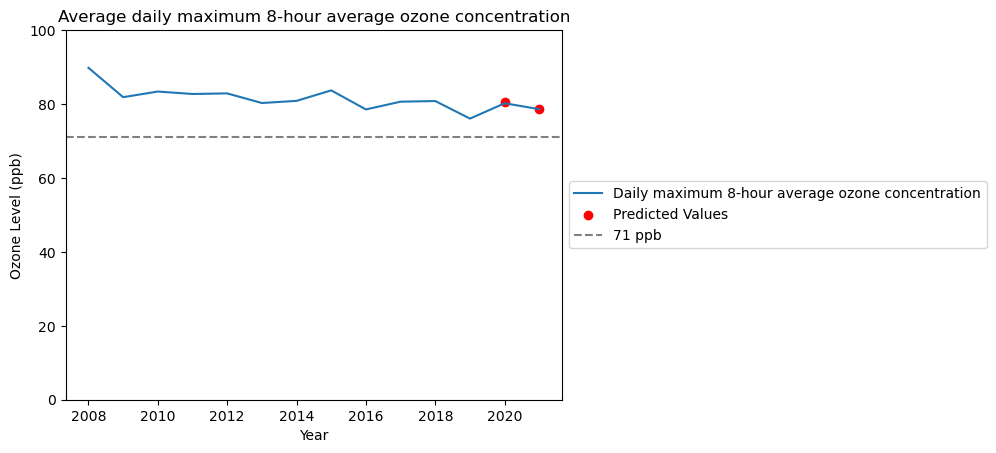

In [119]:
forecast2_lst = [80.658615, 78.643133]
df_forecast2 = pd.DataFrame(list(zip(year_predict, forecast2_lst)), columns=['Year','Max8hr'])
plt.plot(df_max8hr["Year"], df_max8hr["Max8hr"], label = "Daily maximum 8-hour average ozone concentration")
plt.scatter(df_forecast2["Year"], df_forecast2["Max8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb')
plt.ylim(0, 100)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Average daily maximum 8-hour average ozone concentration")
# plt.savefig("max8hr-model2.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()

#### Model for Annual fourth-highest daily maximum 8-hour average ozone concentration (average of all sites)

In [120]:
x_train3 = df_4thhi8hr["4thHi8hr"][:12]
x_test3 = df_4thhi8hr["4thHi8hr"][12:]
model3 = ARIMA(x_train3, order=(1, 1, 0)) 
results3 = model3.fit()
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               4thHi8hr   No. Observations:                   12
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 -26.932
Date:                Thu, 04 Jan 2024   AIC                             57.863
Time:                        17:02:10   BIC                             58.659
Sample:                             0   HQIC                            57.361
                                 - 12                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5537      0.459     -1.205      0.228      -1.454       0.347
sigma2         7.5801      4.341      1.746      0.081      -0.927      16.087
===================================================================================
Ljung-Box (L1) (Q):                   0.26   Jarque-Bera (JB):                 0.95
Prob(Q):                              0.61   Prob(JB):                         0.62
Heteroskedasticity (H):               1.39   Skew:                            -0.51
Prob(H) (two-sided):                  0.76   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [121]:
forecast3 = results3.forecast(2)
rmse3 = sqrt(mean_squared_error(x_test3, forecast3))
print('Test RMSE: %.3f' % rmse3)

Test RMSE: 0.800


In [122]:
wmape3 = wmape(x_test3, forecast3)
print('Weighted Mean Absolute Percent Error: {}%'.format(wmape3 * 100))

Weighted Mean Absolute Percent Error: 1.0495791226832984%


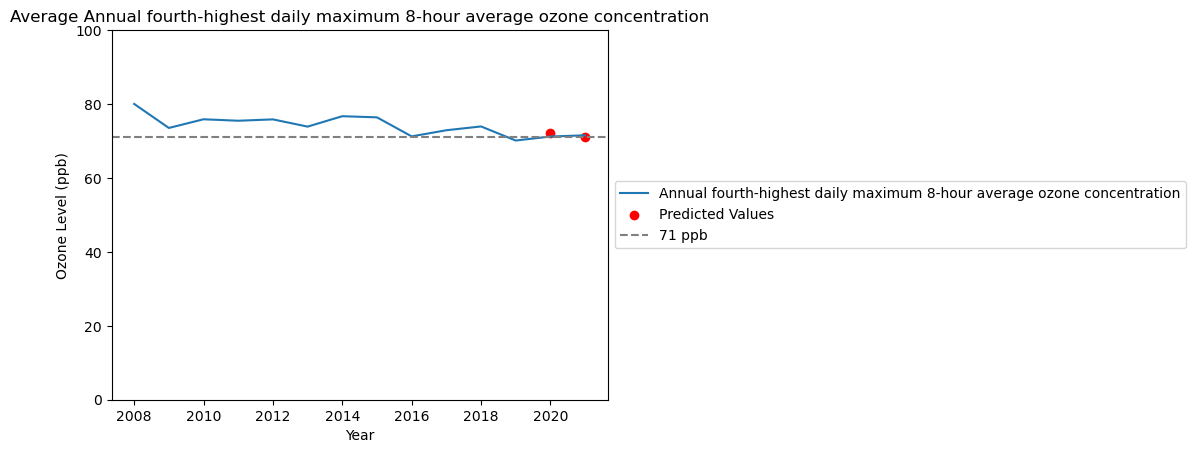

In [123]:
forecast3_lst = [72.239769, 71.071495]
df_forecast3 = pd.DataFrame(list(zip(year_predict, forecast3_lst)), columns=['Year','4thHi8hr'])
plt.plot(df_4thhi8hr["Year"], df_4thhi8hr["4thHi8hr"], label = "Annual fourth-highest daily maximum 8-hour average ozone concentration")
plt.scatter(df_forecast3["Year"], df_forecast3["4thHi8hr"], c = "red", label = "Predicted Values")
plt.axhline(y = 71, color = 'grey', linestyle = 'dashed', label = '71 ppb') 
plt.ylim(0, 100)
lgd = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("Year")
plt.ylabel("Ozone Level (ppb)")
plt.title("Average Annual fourth-highest daily maximum 8-hour average ozone concentration")
# plt.savefig("4thHi8hr-model3.png", bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()